In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/AI_study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Features
- Pregnacies : 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압 (mm Hg)
- SkinThickness: 피부 두께 (mm)
- Insulin: 인슐린 수치 (mu U/ml)
- BMI (Body Mass Index): 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 유전력 함수
- Age: 나이
- Outcome: 당뇨병 여부 (0 or 1) - label


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


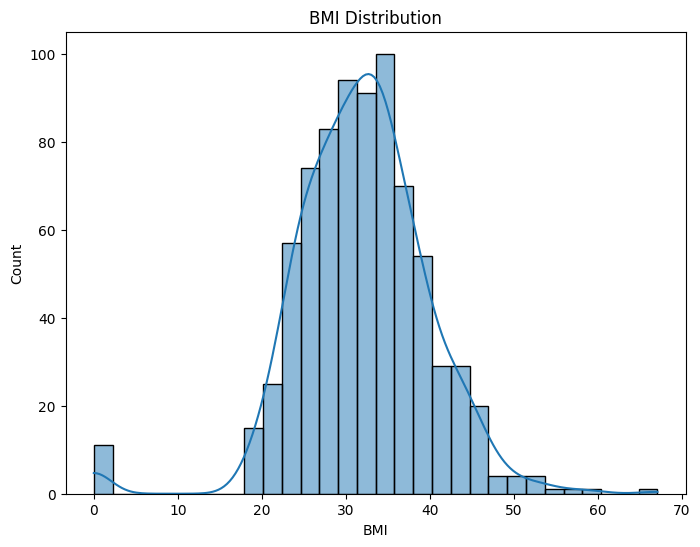

In [7]:
# 히스토그램으로 BMI 분포 시각화
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="BMI", kde=True, bins=30, color="#1f77b4")

# 그래프 제목과 축 라벨 설정
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")

plt.show()

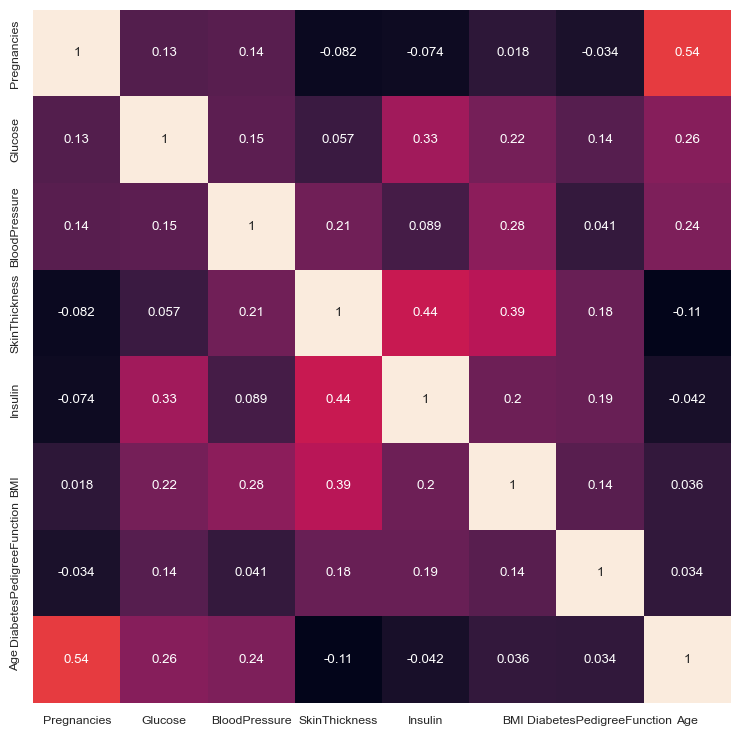

In [8]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(9,9))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## label인 BMI과 높은 상관 관계를 맺는 features
- Glucose(0.22)
- BloodPressure(0.28)
- SkinThickness(0.39)
- Insulin(0.2)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

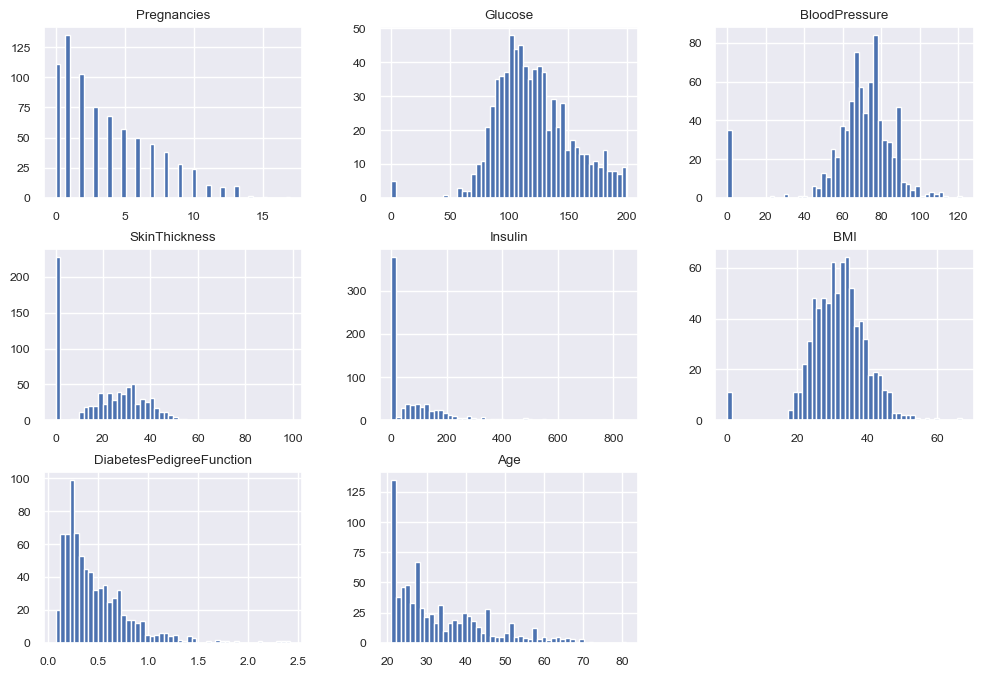

In [9]:
df.hist(bins=50, figsize=(12, 8))

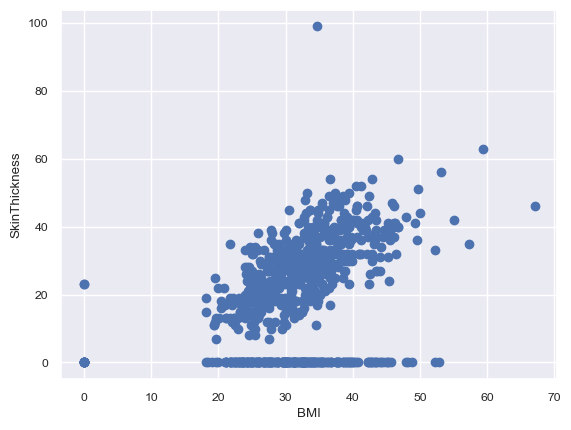

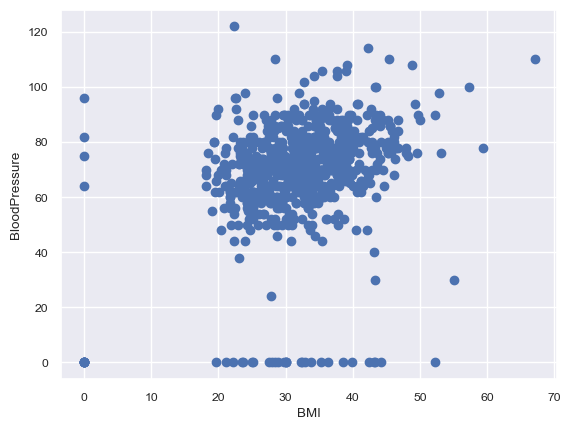

In [10]:
# BMI와 SkinThickness 관계
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

plt.show()

# BMI와 BloodPressure 관계
plt.scatter(df['BMI'], df['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

plt.show()

In [11]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


#### Glucose(혈당 수치), BloodPressure(혈압), SkinThickness(피부 두께), Insulin(인슐린 수치), BMI(체질량 지수)가 0 값이 나오는 것은 이상치로 판단

In [12]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Glucose'] != 0) & 
        (df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  724


42개의 데이터 제거

Skin Thickness, BMI의 경우 이상치를 가진 데이터가 많고, 이상치를 제외하면 정규 분포를 따르기 때문에 평균값으로 대체

In [13]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25320\71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25320\71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25320\71297009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

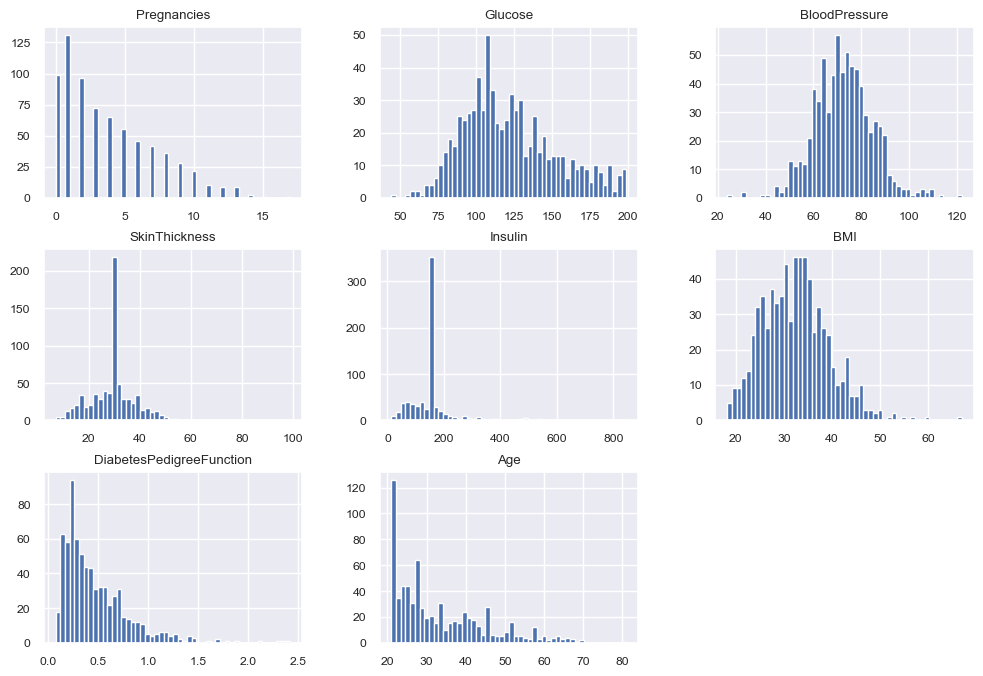

In [15]:
df.hist(bins=50, figsize=(12, 8))

In [16]:
y = df['BMI']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 724, dtype: float64

In [17]:
X = df.drop('BMI', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,0.627,50
1,1,85,66,29.000000,156.056122,0.351,31
2,8,183,64,29.182331,156.056122,0.672,32
3,1,89,66,23.000000,94.000000,0.167,21
4,0,137,40,35.000000,168.000000,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,0.171,63
764,2,122,70,27.000000,156.056122,0.340,27
765,5,121,72,23.000000,112.000000,0.245,30
766,1,126,60,29.182331,156.056122,0.349,47


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((579, 7), (145, 7), (579,), (145,))

In [19]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

## RandomizedSearchCV를 사용해서 하이퍼 파라미터 튜닝

## ML_DecisionTreeRegressor

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint

# 1. 하이퍼파라미터 범위를 randint로 설정
param_dist = {
    'max_depth': randint(3, 11),           # 3부터 10까지의 랜덤 값
    'min_samples_split': randint(2, 11),   # 2부터 10까지의 랜덤 값
    'min_samples_leaf': randint(1, 11)     # 1부터 10까지의 랜덤 값
}

# MSE 스코어를 사용하여 랜덤 서치 수행
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 2. RandomizedSearchCV 설정
clf_dt = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator=clf_dt, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터:  {'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 8}
최적의 MSE:  32.60428174152612


In [21]:
from sklearn.model_selection import cross_val_score

# 3. 최적의 하이퍼파라미터로 모델 평가
best_clf_dt = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_dt, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [29.35549547 40.9789244  30.15660283 34.06814397 28.46224203]
평균 MSE: 32.60428174152612


- cross_val_score 함수는 크면 좋은 값을 기준으로 결과를 반환하는 설계를 가짐 (정확도와 같은 지표는 값이 클수록 좋은것이므로 그대로 양수로 반환)
- 하지만, MSE와 같은 오차 지표는 작을수록 좋은 지표이기 때문에 cross_val_score 함수는 이러한 지표를 최대화하려고 할 때, 음수로 변환하여 반환
- 따라서 실제 MSE 값을 얻고 싶은 경우 -scores로 변환하면 얻을 수 있음

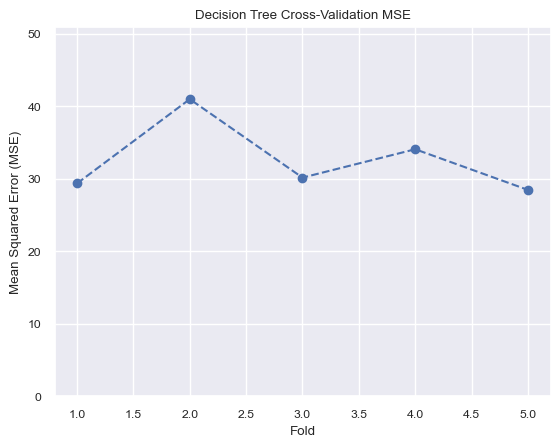

Mean MSE across folds: 32.60428174152612


In [22]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Decision Tree Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_dt.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Decision Tree Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Decision Tree Regressor ---
Mean Squared Error (MSE): 28.87960156526301
Mean Absolute Error (MAE): 4.201814747692318
R² Score: 0.3259795700956032


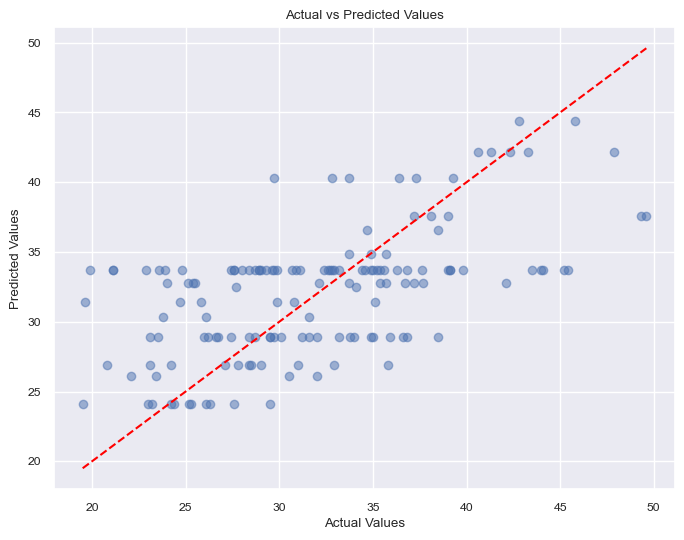

In [24]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_dt.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'fit_intercept': [True, False],  # 절편 포함 여부
    'n_jobs': [None, -1]             # 병렬 처리 설정
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (LinearRegression 모델 사용)
clf_lr = LinearRegression()
random_search = RandomizedSearchCV(estimator=clf_lr, param_distributions=param_dist, n_iter=5, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 하이퍼파라미터:  {'n_jobs': None, 'fit_intercept': True}
최적의 MSE:  31.453929358411735


I:\anaconda3\envs\test01\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [26]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_lr = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_lr, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [28.98803048 34.40673186 36.47510834 35.02590156 22.37387455]
평균 MSE: 31.453929358411735


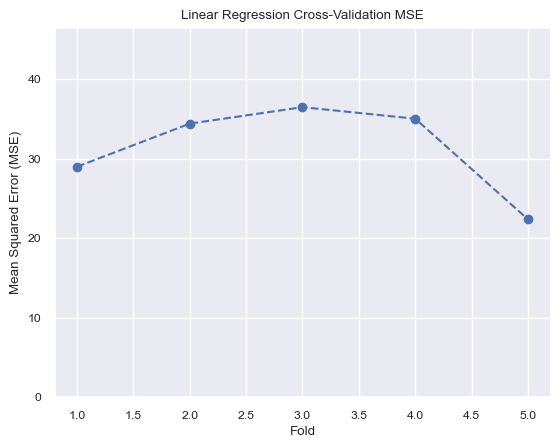

Mean MSE across folds: 31.453929358411735


In [27]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Linear Regression Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_lr.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Linear Regression Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Linear Regression Regressor ---
Mean Squared Error (MSE): 27.74838608358668
Mean Absolute Error (MAE): 4.19487452342295
R² Score: 0.3523809850718782


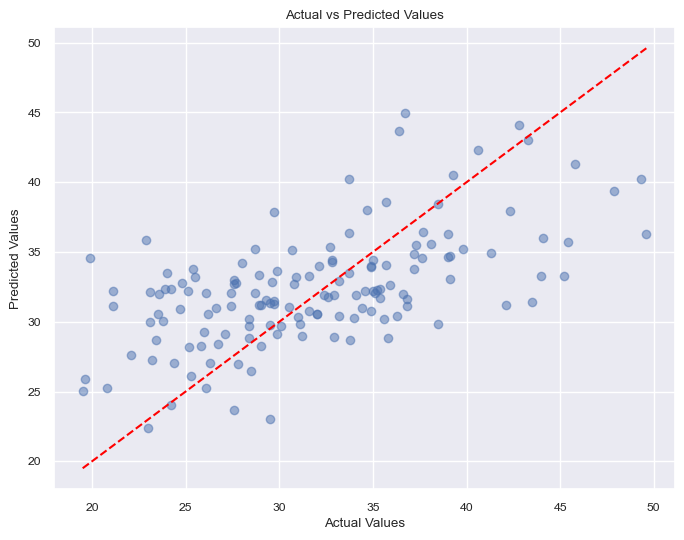

In [29]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_lr.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_SVR

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import uniform

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'C': uniform(0.1, 10),              # 규제 강도 (C)
    'epsilon': uniform(0.01, 1),        # 허용 오차 (epsilon)
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # 커널 함수 선택
    'degree': [2, 3, 4],                # 다항 커널의 차수 (poly 커널에만 해당)
    'gamma': ['scale', 'auto']          # 커널 계수 (rbf, poly, sigmoid에만 해당)
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (SVR 모델 사용)
clf_svr = SVR()
random_search = RandomizedSearchCV(estimator=clf_svr, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터:  {'C': 2.7082917483040903, 'degree': 2, 'epsilon': 0.1031027678058992, 'gamma': 'auto', 'kernel': 'linear'}
최적의 MSE:  31.089672736304397


In [31]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_svr = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_svr, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [28.60318092 35.31325371 35.89428063 33.57488524 22.06276318]
평균 MSE: 31.089672736304397


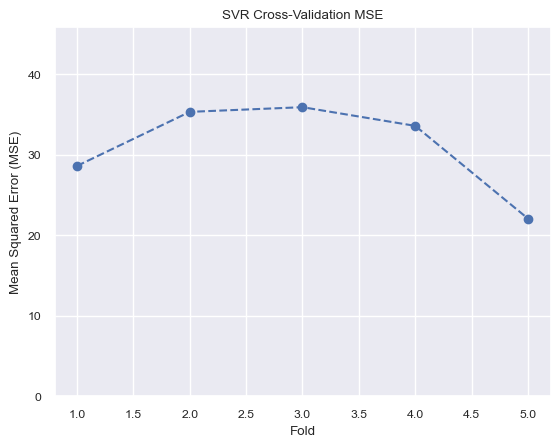

Mean MSE across folds: 31.089672736304397


In [32]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('SVR Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_svr.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- SVR Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- SVR Regressor ---
Mean Squared Error (MSE): 27.94232950979964
Mean Absolute Error (MAE): 4.21119171273931
R² Score: 0.34785454341658795


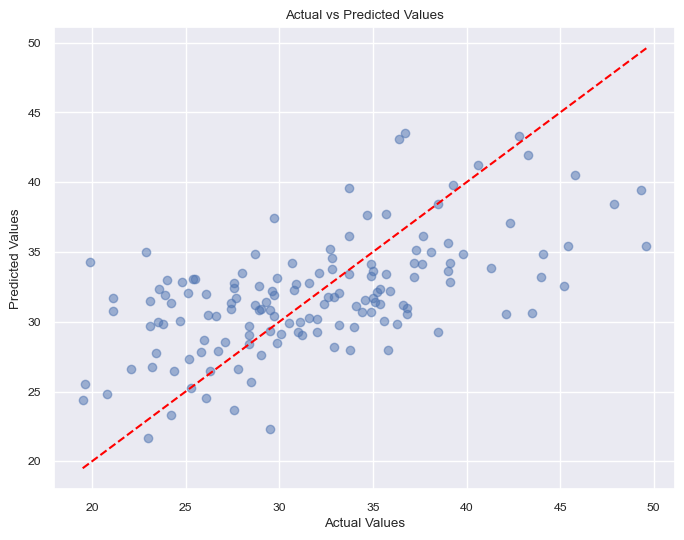

In [34]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_svr.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint, uniform

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'n_estimators': randint(50, 500),       # 트리의 개수
    'max_depth': randint(3, 20),            # 트리의 최대 깊이
    'min_samples_split': randint(2, 20),    # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': randint(1, 10),     # 리프 노드가 되기 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'], # 각 트리에서 고려할 최대 특성 수
    'bootstrap': [True, False],             # 부트스트랩 샘플링 여부
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (RandomForestRegressor 모델 사용)
clf_rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=clf_rf, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


I:\anaconda3\envs\test01\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "I:\anaconda3\envs\test01\lib\site-package

최적의 하이퍼파라미터:  {'bootstrap': True, 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 257}
최적의 MSE:  30.294346424614652


In [37]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_rf = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_rf, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [29.56266853 35.67446002 28.66569083 33.73502783 23.83388491]
평균 MSE: 30.294346424614652


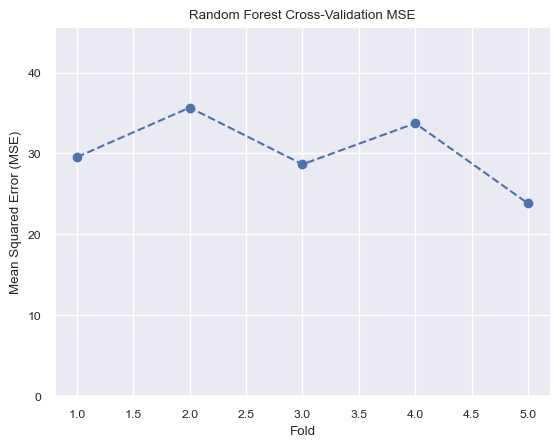

Mean MSE across folds: 30.294346424614652


In [38]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Random Forest Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_rf.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Random Forest Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Random Forest Regressor ---
Mean Squared Error (MSE): 25.891082466595236
Mean Absolute Error (MAE): 4.010292666698882
R² Score: 0.39572855617872227
